# Wineデータセット

## インポートとデータの取得

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

warnings.filterwarnings('ignore')

%matplotlib inline

#データの取得(ワインデータ)
wine = load_wine()

## データの詳細

### 公式説明文

In [2]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### データの内容

#### データの目的  
  化学データに基づいてワインを分類する。ワインはイタリアの同じ地域で栽培されたワインで3か所の栽培者によって作成されたワイン。13つの化学指標によって3種類に分類する。  

#### クラスの分類

- class_0(59個)
- class_1(71個)
- class_2(48個)

#### 化学指標の種類(13種類)

  - アルコール  
  - リンゴ酸  
  - アッシュ  
  - 灰のアルカリ度  
  - マグネシウム  
  - 総フェノール  
  - フラバノイド  
  - ノンフラバノイドフェノール  
  - プロアントシアニン  
  - 色の強度  
  - 色相（Ｈ）  
  - 希釈ワインのOD280 / OD315  
  - プロリン  
  単位がわからない。。。
  
#### データ数、クラス数

  - クラス数: 3種類
  - Attribute数: 14種類...化学指標(13つ)＋クラス分類(1つ)
  - データ数: 178個

## データ分析

### データ分析の準備

In [3]:
df_wine = pd.DataFrame(
    wine.data,
    columns=wine.feature_names
)

df_wine['class'] = wine.target

df_wine['class'] = df_wine['class'].map({
    0: 'class_0',
    1: 'class_1',
    2: 'class_2'
})

In [4]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [5]:
# データの内容の確認
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
class                           178 non-null object
dtypes: float64(13), object(1)
memory usage: 19.5+ KB


In [6]:
# 欠損値の確認
df_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

### 基本的な統計量

In [7]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### データの可視化

#### 各データのヒストグラム

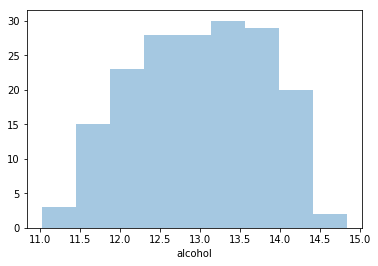

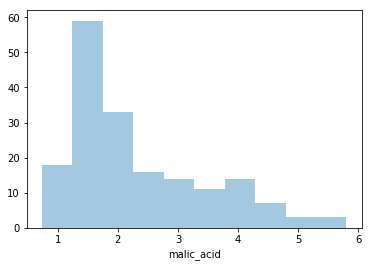

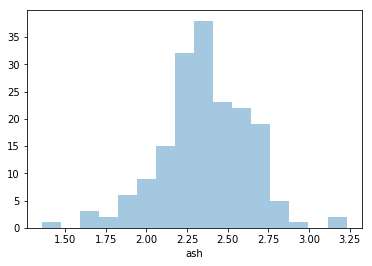

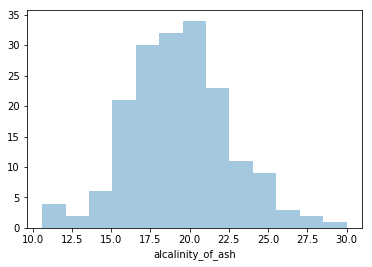

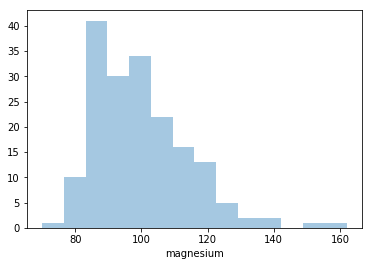

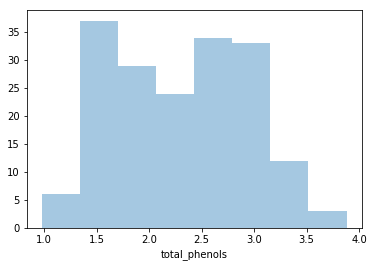

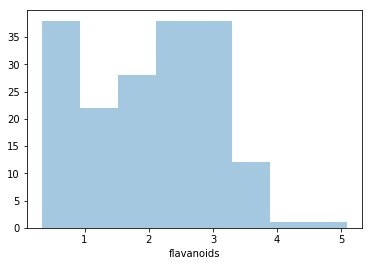

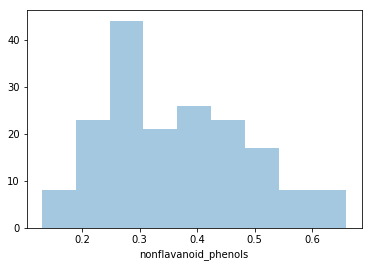

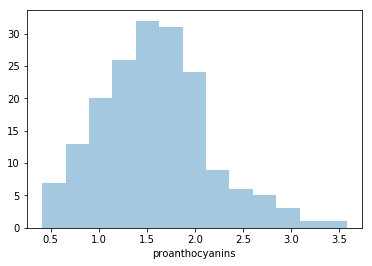

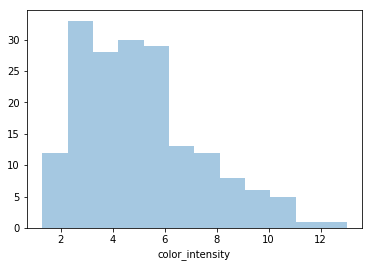

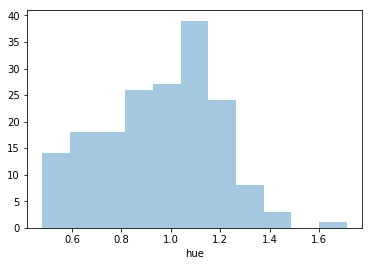

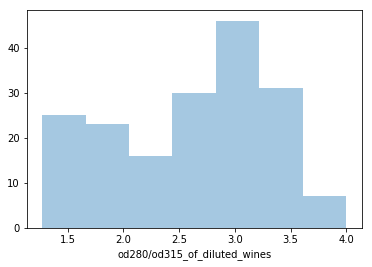

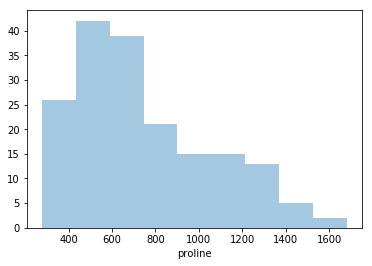

In [8]:
for data in df_wine:
    if data != 'class':
        sns.distplot(df_wine[data], kde=False)
        plt.show()

#### kdeプロット

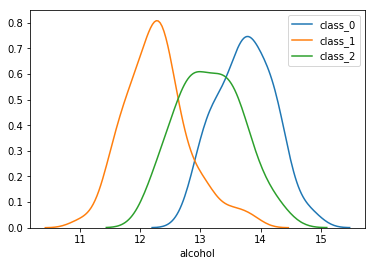

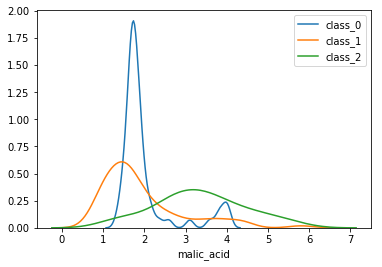

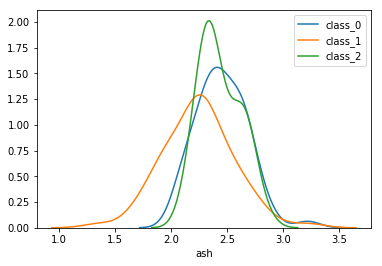

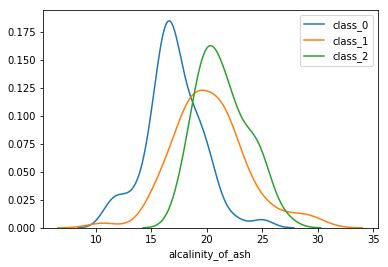

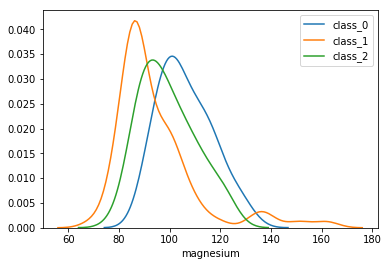

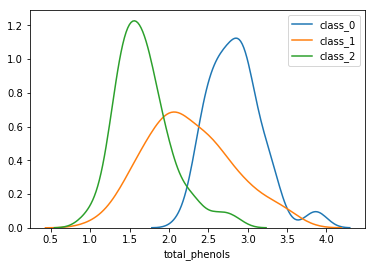

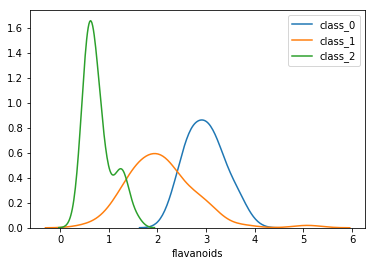

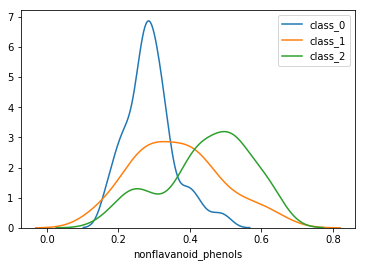

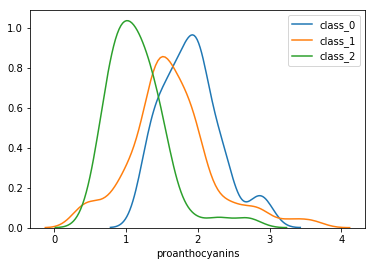

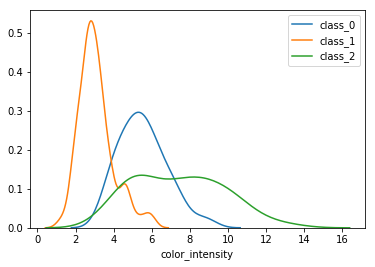

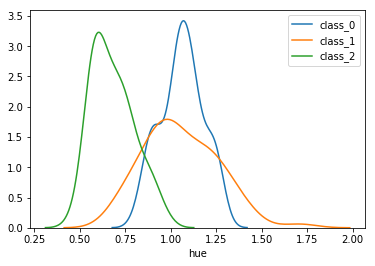

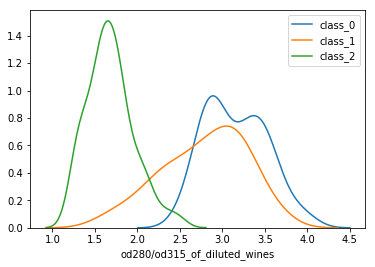

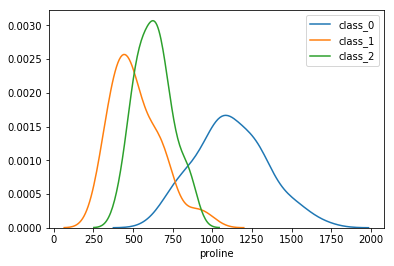

In [9]:
for data in df_wine:
    if data != 'class':
        sns.kdeplot(df_wine[df_wine['class'] == 'class_0'][data], label = 'class_0')
        sns.kdeplot(df_wine[df_wine['class'] == 'class_1'][data], label = 'class_1')
        sns.kdeplot(df_wine[df_wine['class'] == 'class_2'][data], label = 'class_2')
        plt.xlabel(data)
        plt.legend()
        plt.show()

### データの関係性の可視化

#### pairプロット

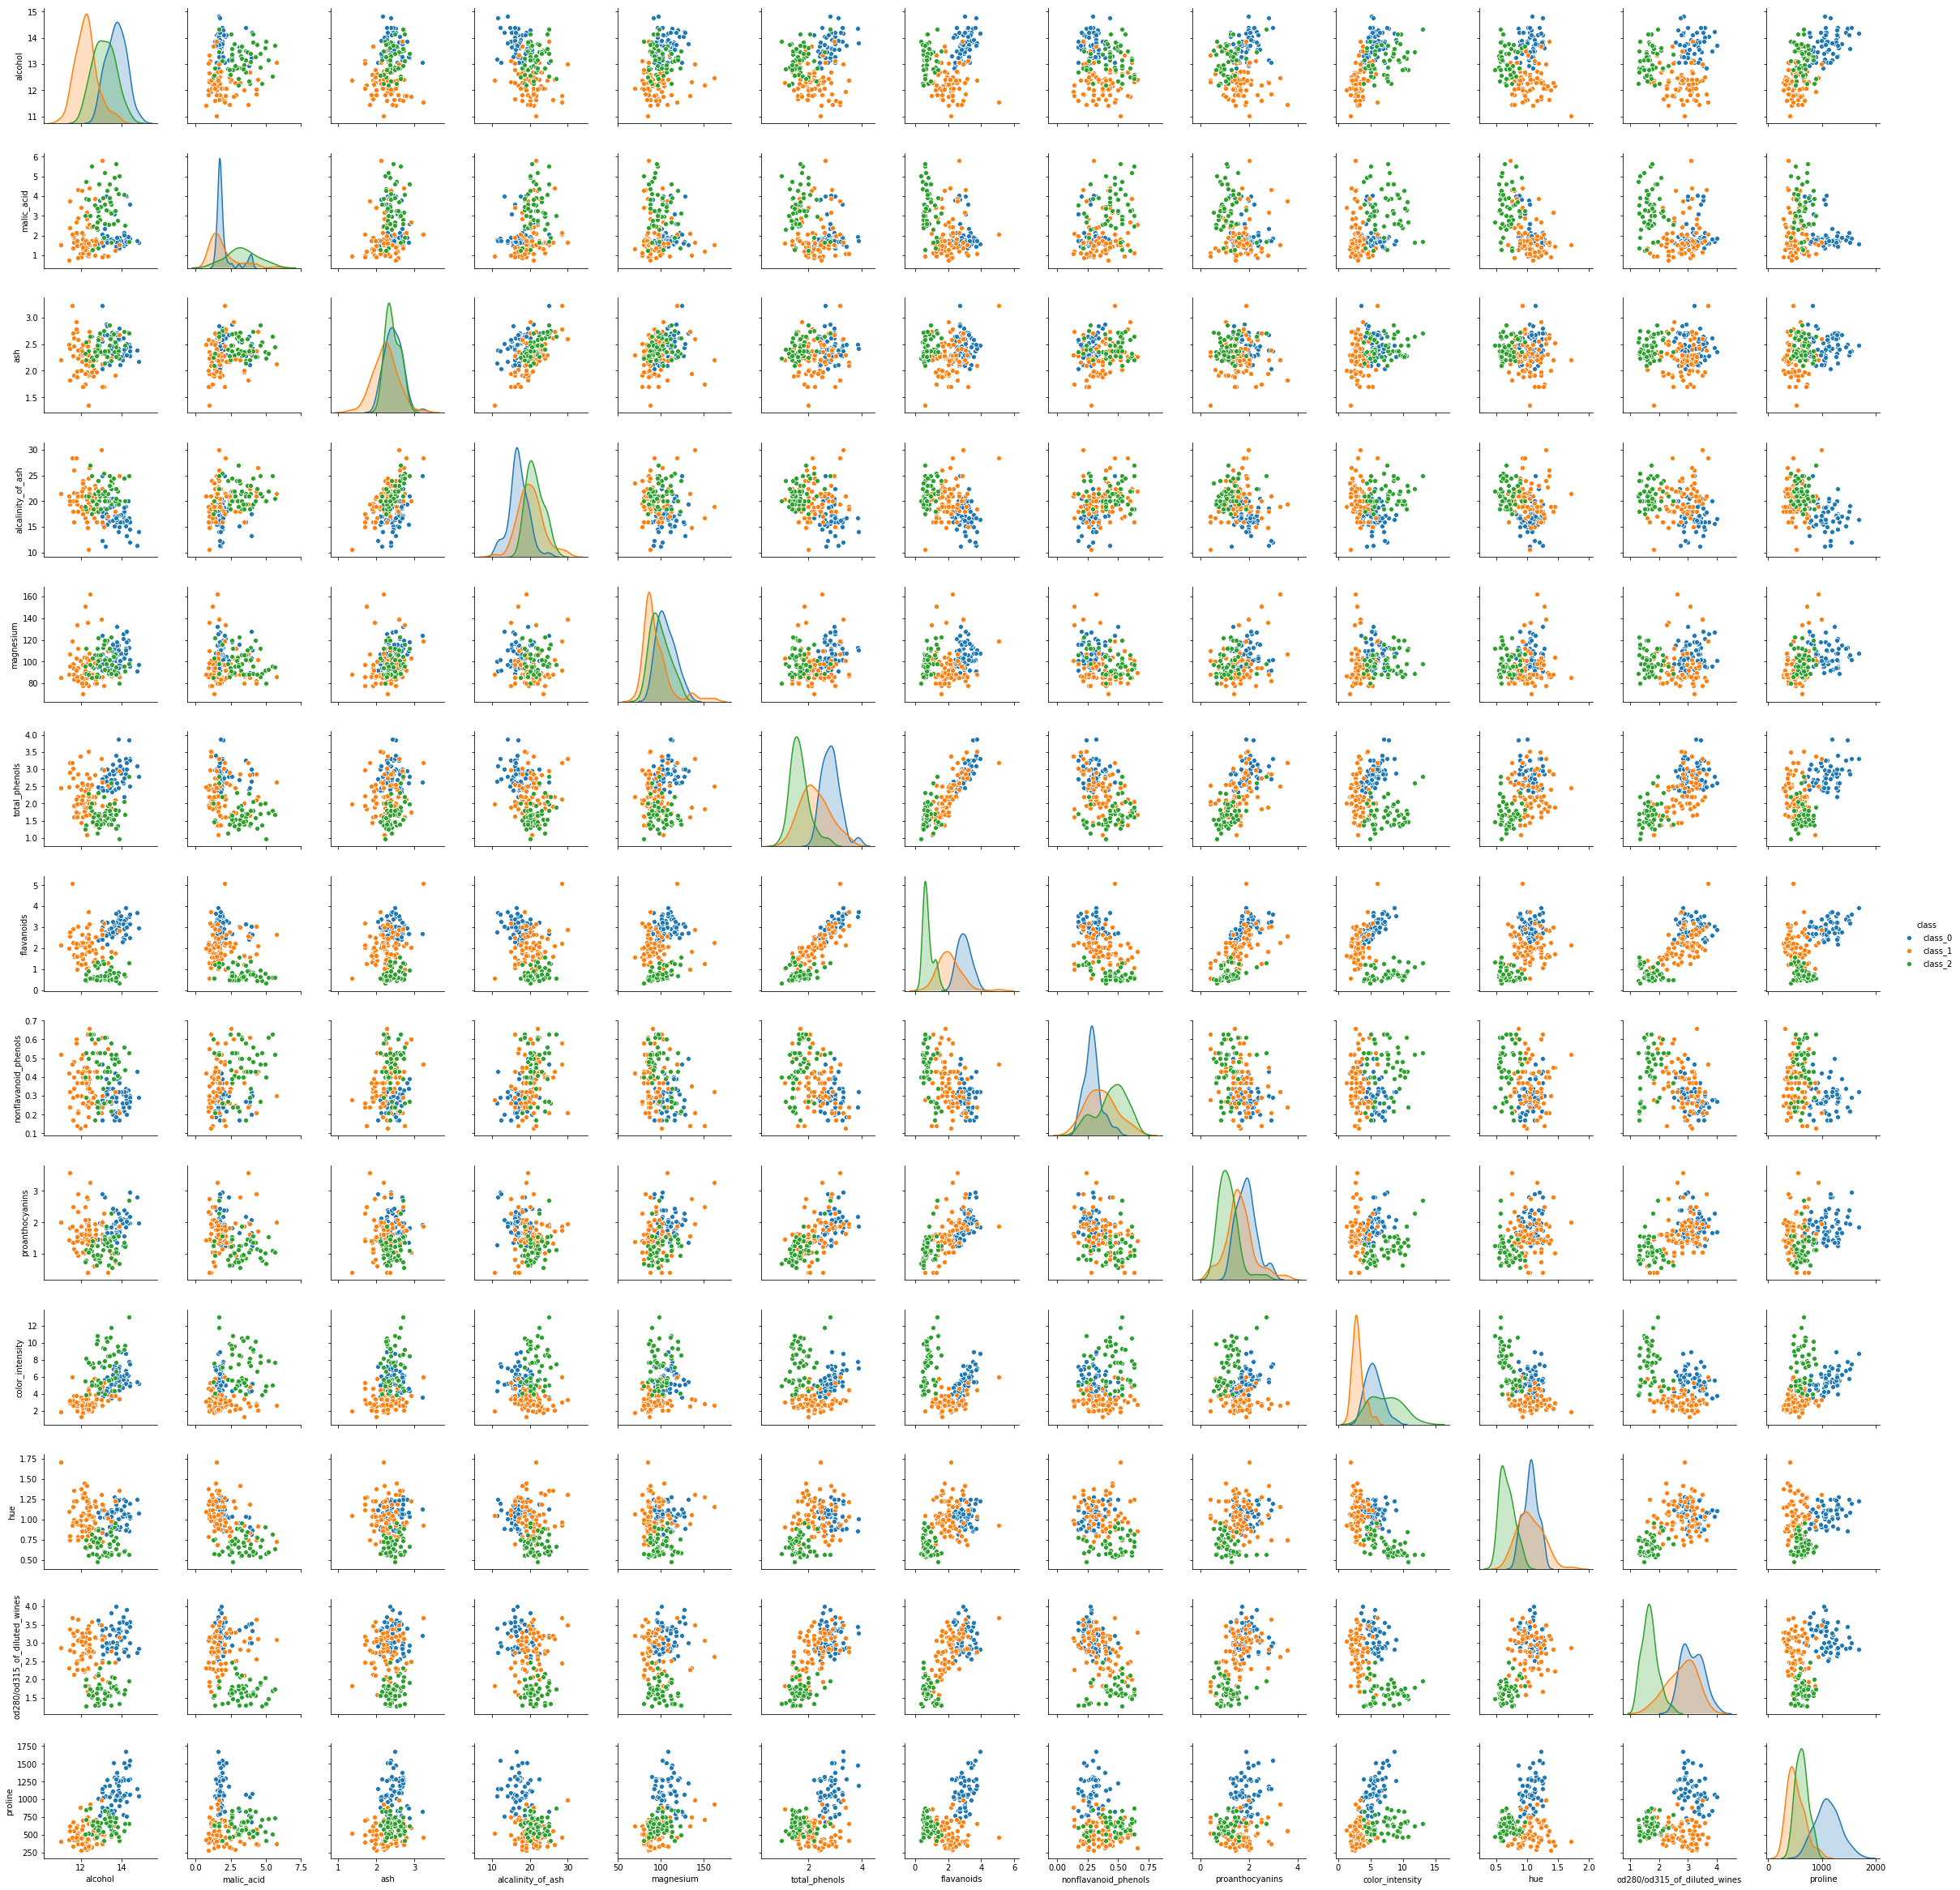

In [10]:
sns.pairplot(df_wine, hue='class')

#### ヒートマップ

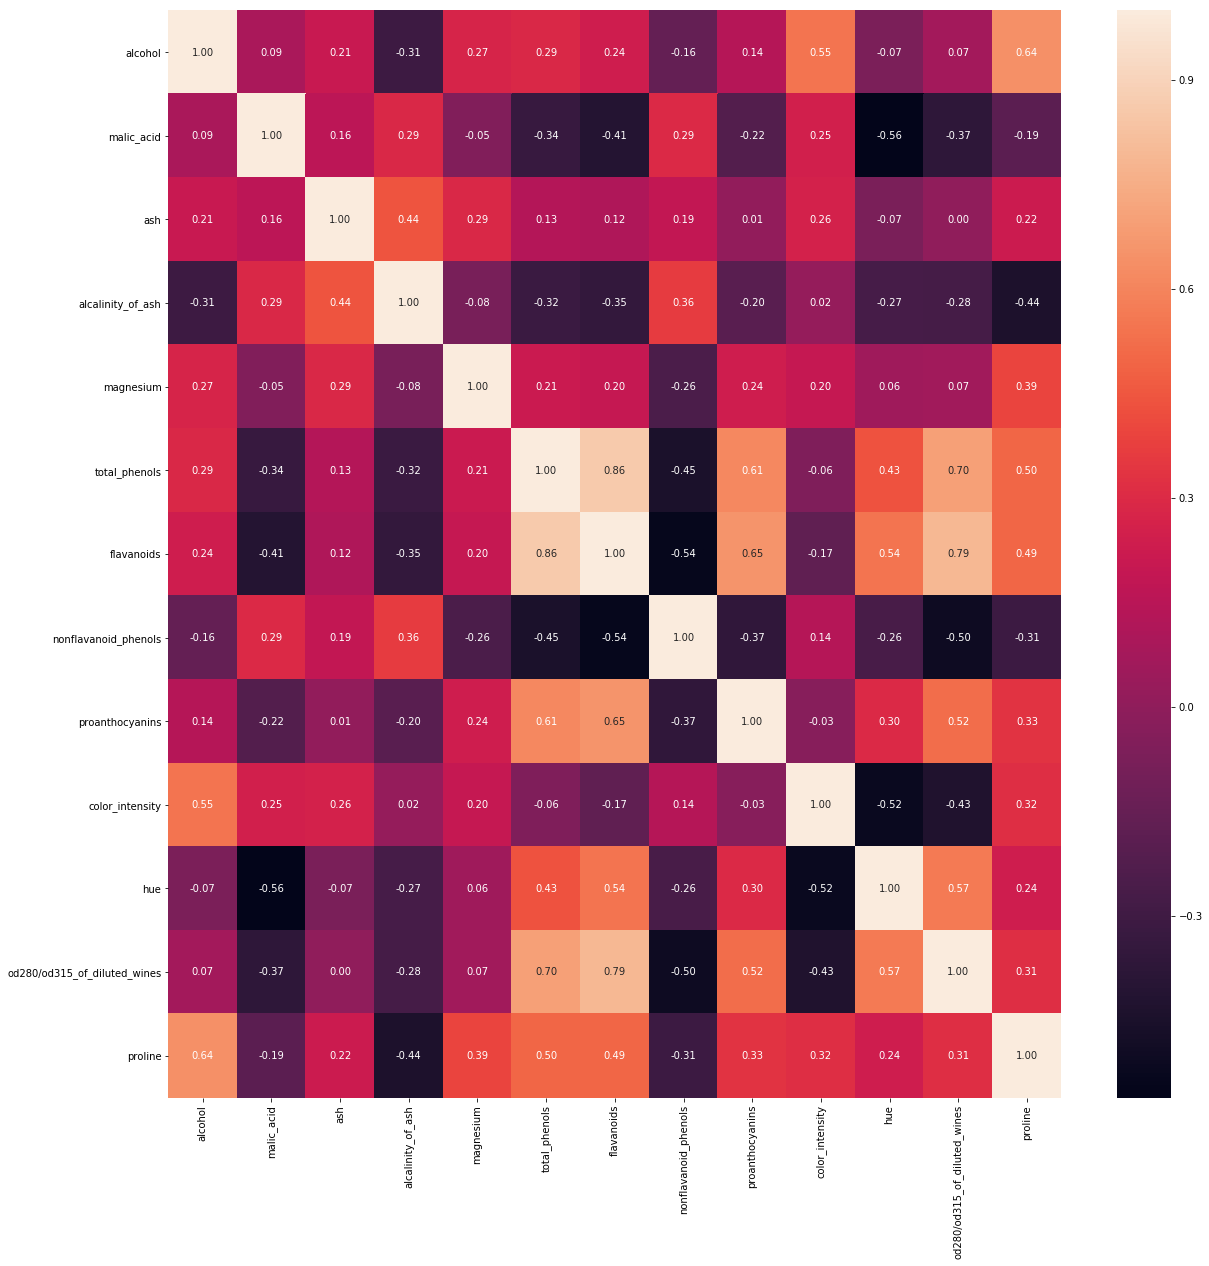

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    df_wine.corr(),
    annot=True,
    fmt='.2f'
)

## データの考察と分析

### データの相関関係

- ポリフェノールと総フェノール数  
flavanoids(ポリフェノール)とtotal_phenols(総フェノール数)の相関係数が高く(0.86)、プロットを見ても直線性が高い。これはポリフェノールはフェノールの中で多くヒドロキシ基を含んだものを示しているとのことなので自明であると考えられる。これらのことから、この二つのどちらかの値は除去して分析するほうが良いと考えられる。

- ポリフェノール、総フェノール数とod280/od350_of_diluted_wines
ここも相関が高そうだが、od280/od350_of_diluted_winesのパラメータの意味が分からないので調べる。

### データのクラス分類に有用そうな値

- ポリフェノールと総フェノール数  
ヒストグラムの散らばりとkdeプロットからclass_0とclass_2がポリフェノールか総フェノール数どちらかを見ればクラス分類に有効そうである。

- ペアプロット  
以下のデータのペアプロットを見ると、各クラスごとにまとまっているのでクラス分類に有効に使えそうである。
  - proline と hue
  - proline と od280/od350_of_diluted_wines,総フェノール数,ポリフェノール
  - proline と color_intensity
  - alcohol と od280/od350_of_diluted_wines,総フェノール数,ポリフェノール
  - alcohol と hue

以上のことから、
  - alcohol
  - hue
  - proline
  - od280/od350_of_diluted_wines,総フェノール数,ポリフェノールのどれか
  
このあたりのパラメータを見ればうまく分類できるのではないかと考えられる。